In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import re



****1. Read from tsv and plot****

In [2]:
# 54/0.006896
# 7911.0/ 0.983503
24/0.002310

10389.61038961039

In [3]:
df = pd.read_csv('train.csv')

# sns.plot(data=df, x='pos',y=A_fraction)
df.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN


For every pos there is one missing value for in nucleotide count (and respective frequency is missing too).
Restoring total number of reads returns different values:
* A| 7911.0/0.983503 == 8044
* C| 54.0/0.006896 == 7831
* T| 11.0/0.000815 = 13497

Same is true for other rows.

For simplification we will consider missing freqency as (1-a-b-c), where a,b,c are remaining frequencies.

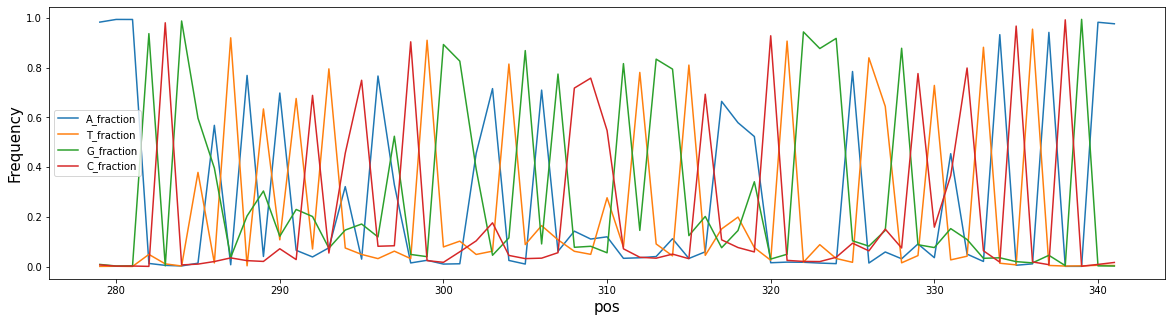

In [4]:
freq_df = df.iloc[:,[0,10,11,12,13]].set_index('pos')

for index, row in freq_df.iterrows():
    mask = row.isna().values
    row[mask] = 1 - np.sum(row[~mask])


freq_df.plot(figsize=(20, 5))
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('pos', fontsize=15)
plt.show()


**2. Data selection**

In [31]:
df_part = df[df['matches'] > df['matches'].mean()][['pos', 'reads_all', 'mismatches',
                                                      'deletions', 'insertions']]

df_part.to_csv('train_part.csv')

**3. EDA of dataset** 

Int his dataset we have data about 499 customers and some info about their purchases, marital status, educatuin, income, burth year

In [6]:
eda = pd.read_csv('customers.csv')

In [7]:
eda.head()

,customer_id,year_of_birth,educational_level,marital_status,annual_income,purhcase_date,recency,online_purchases,store_purchases,complaints,calls,intercoms
0,20201701,1982,Graduation,Single,58138.0,9/4/2012,58,8,4,0,3,11
1,20201702,1950,Graduation,Married,46344.0,3/8/2014,38,1,2,0,3,11
2,20201703,1965,Graduation,Divorced,71613.0,8/21/2013,26,8,10,0,3,11
3,20201704,1984,Graduation,Relationship,26646.0,2/10/2014,26,2,4,0,3,11
4,20201705,1981,PhD,Widowed,58293.0,1/19/2014,94,5,6,0,3,11


All columns except educational_level, marital_status and purhcase_date contain numbers.

In [8]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        499 non-null    int64  
 1   year_of_birth      499 non-null    int64  
 2   educational_level  499 non-null    object 
 3   marital_status     499 non-null    object 
 4   annual_income      486 non-null    float64
 5   purhcase_date      499 non-null    object 
 6   recency            499 non-null    int64  
 7   online_purchases   499 non-null    int64  
 8   store_purchases    499 non-null    int64  
 9   complaints         499 non-null    int64  
 10  calls              499 non-null    int64  
 11  intercoms          499 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 46.9+ KB


We have 499 customers and 12 columns with data. There are no null values in dataframe. Also, "purhcase_date" contains typo

In [9]:
eda = eda.rename(columns={'purhcase_date':'purchase_date'})

In [10]:
eda['educational_level'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', 'High School'],
      dtype=object)

looks OK

In [11]:
eda['marital_status'].unique()

array(['Single', 'Married', 'Divorced', 'Relationship', 'Widowed',
       'Widow'], dtype=object)

Not uniformed. Let's male all widows widowed!!

In [12]:
eda['marital_status'] = eda['marital_status'].replace('Widow', 'Widowed')

Do we have duplocates?

In [13]:
eda.drop_duplicates().shape

(499, 12)

No, we don't.
Let's look on some stats.

In [14]:
eda = eda.drop(columns='customer_id')

In [15]:
eda.describe()

,year_of_birth,annual_income,recency,online_purchases,store_purchases,complaints,calls,intercoms
count,499.000000,486.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,1978.284569,51454.504115,48.228457,3.969940,5.779559,0.252505,3.370741,10.168337
std,14.471242,21619.285903,29.077101,2.813675,3.301378,1.115953,4.327091,2.800552
min,1899.000000,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1970.000000,33858.000000,23.000000,2.000000,3.000000,0.000000,3.000000,11.000000
50%,1981.000000,50841.500000,47.000000,3.000000,5.000000,0.000000,3.000000,11.000000
75%,1989.000000,68483.750000,74.000000,6.000000,8.000000,0.000000,3.000000,11.000000
max,2000.000000,157243.000000,99.000000,27.000000,13.000000,11.000000,88.000000,44.000000


Here we can see some intresting stuff. with avg birthyear 1978 we have some really old person - 1899 year og birth! Also we can see, that at least 75% customers don't leave complaints. With median online purchases we have someone who bought onlibe 27 times.

Let's see grouped data

In [16]:
eda.groupby('educational_level').mean()


,year_of_birth,annual_income,recency,online_purchases,store_purchases,complaints,calls,intercoms
educational_level,,,,,,,,
Basic,1982.000000,19514.571429,53.571429,1.571429,2.857143,0.857143,3.000000,7.857143
Graduation,1979.042802,51607.827309,47.171206,3.887160,5.840467,0.217899,3.630350,10.291829
High School,1984.175000,44154.717949,58.400000,3.450000,4.600000,0.200000,3.050000,9.750000
Master,1977.555556,51191.700000,45.000000,4.049383,5.691358,0.296296,3.098765,10.172840
PhD,1974.798246,55878.990991,49.008772,4.429825,6.298246,0.280702,3.114035,10.175439


In [17]:
eda.groupby('educational_level').std()

,year_of_birth,annual_income,recency,online_purchases,store_purchases,complaints,calls,intercoms
educational_level,,,,,,,,
Basic,9.469248,8204.955613,27.621593,0.786796,0.690066,2.267787,0.000000,4.259443
Graduation,13.722775,21410.738907,28.451746,2.933992,3.303915,1.100067,5.890897,3.080377
High School,12.520522,22919.267206,32.546456,2.640416,2.725003,0.822753,1.413307,2.880082
Master,14.345731,19890.059676,29.035323,2.626315,3.235127,1.249444,1.179035,2.240481
PhD,16.267770,21314.855586,28.986263,2.716613,3.463922,1.051832,1.381027,2.293684


Among intresting we can see that annual income is drasstically differs from other groups only in Basic educational level. Differncies between other groups is insignificant.

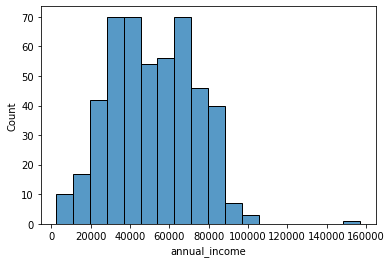

In [18]:
sns.histplot(eda['annual_income'])

Looks like bimodal distribution.

educational_level
Basic          AxesSubplot(0.125,0.125;0.775x0.755)
Graduation     AxesSubplot(0.125,0.125;0.775x0.755)
High School    AxesSubplot(0.125,0.125;0.775x0.755)
Master         AxesSubplot(0.125,0.125;0.775x0.755)
PhD            AxesSubplot(0.125,0.125;0.775x0.755)
Name: annual_income, dtype: object

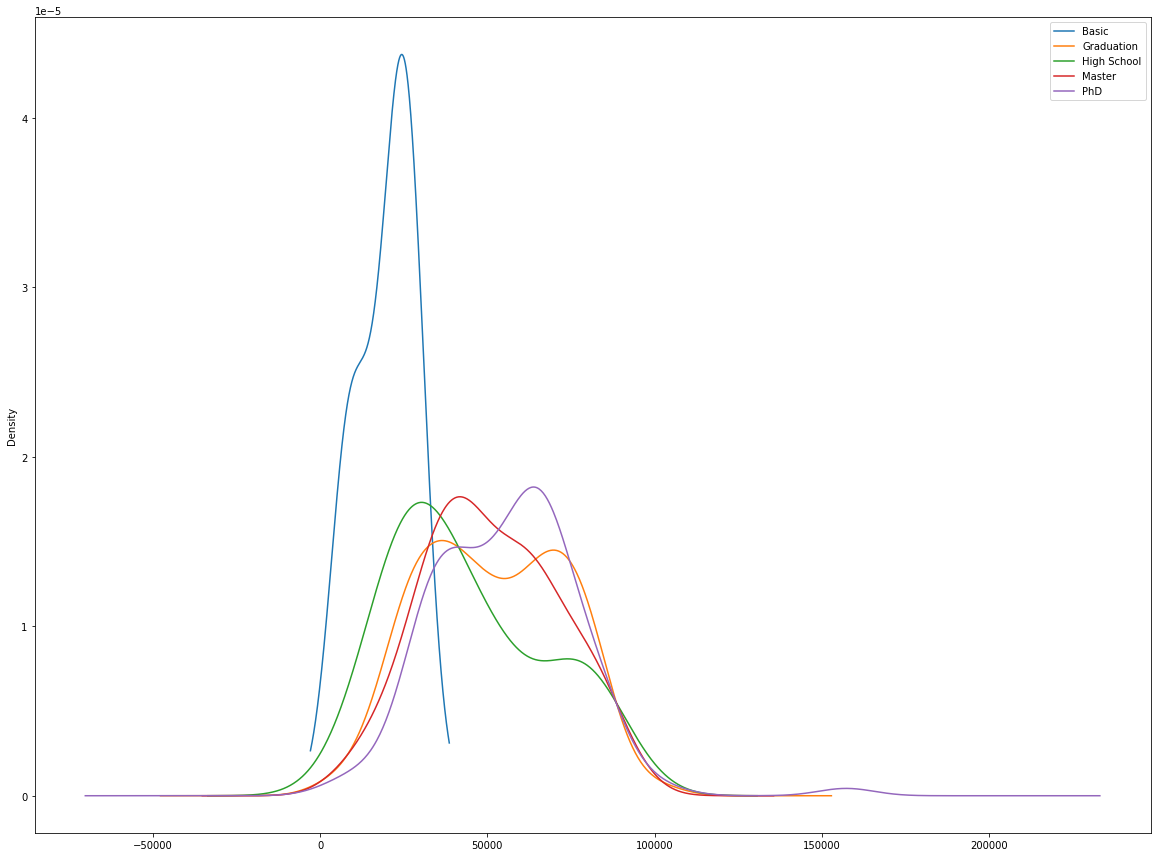

In [19]:
eda.groupby('educational_level')['annual_income'].plot.density(legend=True,figsize=(20,15))

We can assume that first peak of bimodal distibution is comprised of customers with Basic ad some High-school educatuin.

Let's look at correlations between numeric variables

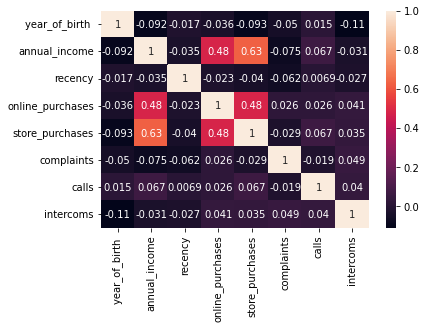

In [20]:
correlations = eda.corr()
sns.heatmap(correlations, xticklabels=correlations.columns,
            yticklabels=correlations.columns, annot=True);

The only strong correlations we see is between annual income

#### 4. working with real data (.gff, .bed)
##### 4.1 Write function for reading .gff and .bed

In [21]:
def read_gff(path):
    """
    Reads .gff file from path, renames columns and returns pd.DatFrame
    """
    return pd.read_csv(path,
                       sep="\t",
                       names=["chromosome","source","type","start","end",
                              "score","strand","phase","attributes"],
                       comment="#")


def read_bed6(path):
    """
    Reads 6-column .bed file from path, renames columns and returns pd.DatFrame
    """
    return pd.read_csv(path,
                       sep="\t",
                       names=["chromosome","start","end","name","score","strand"])

##### 4.2 reformat attribute column data to readble format

In [22]:
gff = read_gff('rrna_annotation.gff')

gff['attributes'] = gff['attributes'].str.replace('=','_').str.split('_').str[1]

##### 4.3  Count grouped data and plot it

In [23]:
gff.groupby(["chromosome",'attributes']
           ).agg({'attributes':'count'}
                ).rename(columns={'attributes':'count'}
                        ).unstack(fill_value=0)


count        
attributes     16S 23S  5S
chromosome                
Reference_1      2   2   2
Reference_10     5   5   0
Reference_11     2   2   2
Reference_12     2   2   2
Reference_13     4   4   4
Reference_14     4   4   5
Reference_15     8   8   8
Reference_16     7   7   8
Reference_17     7   7   8
Reference_18     2   3   2
Reference_19     7   7   8
Reference_2      5   5   5
Reference_20    11  10  10
Reference_21     1   1   1
Reference_22     4   4   4
Reference_23     1   1   1
Reference_24     4   4   4
Reference_25     3   3   3
Reference_26     4   4   4
Reference_3      2   2   2
Reference_4      8  10   6
Reference_5      6   6   6
Reference_6      2   2   2
Reference_7      9   8   8
Reference_8      2   2   0
Reference_9      6   6   6

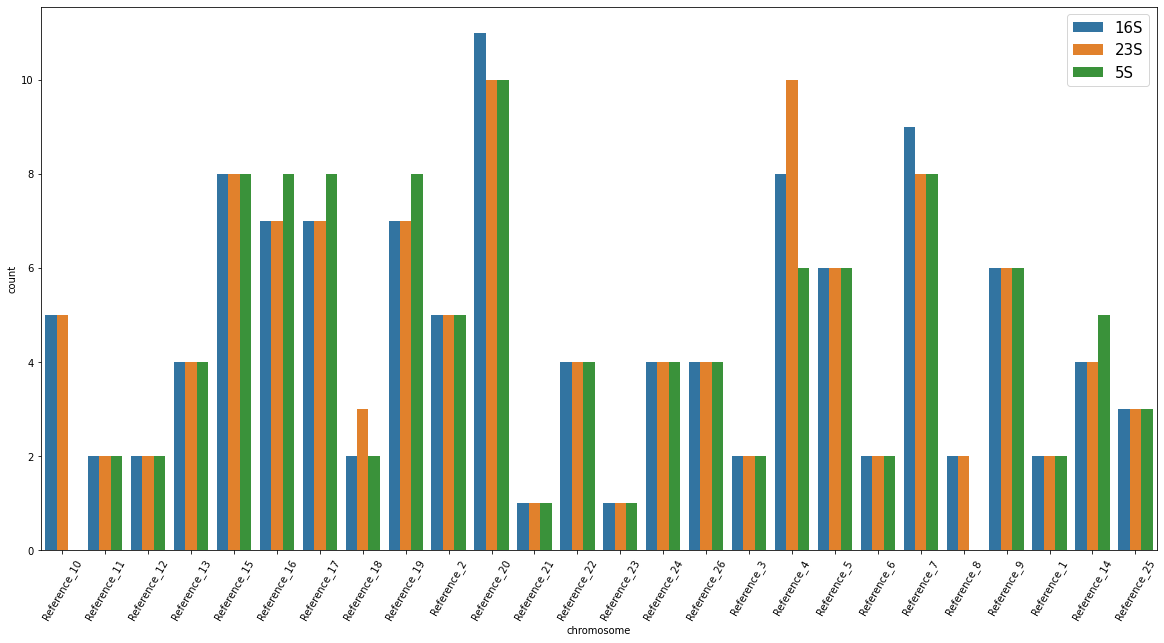

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(data=gff, x=gff.chromosome, hue=gff.attributes)
plt.xticks(rotation = 60)
plt.legend(fontsize=15)
plt.show()


##### 4.4 reproduce bedtools intersec

We can do it by merging both tables with innier join and just filter rows where rrnas falls into contig

In [26]:
bed = read_bed6('alignment.bed')
comb_tbl = gff.merge(bed, how='inner', on='chromosome')
comb_tbl = comb_tbl[(comb_tbl['start_y'] < comb_tbl['start_x']) & (comb_tbl['end_y'] >= comb_tbl['end_x'])]

comb_tbl

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+
